## Steps in building a machine learning model

1. Get the Data
    
2. Data Check

3. Split the Data (Train/Validation/Test)

4. EDA and Feature Importance

5. Training and model selection

6. Select a Final Model

7. Final model evaluation

It has to change the path of the data according to the location of the folder of the repo.

## 1. Get Data.

The information about the data set is in the "01 Data" folder. Check for the description of the columns.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from tqdm.auto import tqdm

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'/Users/fdl/Repos/ML-ZoomCamp---Midterm-project/01 Data/new_train.csv')

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## 2. Data Check.

Exploration of the dataset (values for the different types of variables, missing values, max and min values).

In [3]:
# We can see if there are missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [4]:
# Review columns data types
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

# number of unique values in categorical columns
df[categorical_columns].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [5]:
# different values in categorical columns
for column in categorical_columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print('-----------------------')

Column: job
job
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: count, dtype: int64
-----------------------
Column: marital
marital
married     19953
single       9257
divorced     3675
unknown        65
Name: count, dtype: int64
-----------------------
Column: education
education
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: count, dtype: int64
-----------------------
Column: default
default
no         26007
unknown     6940
yes            3
Name: count, dtype: int64
-----------------------
Column: housing
housing
yes        17254
no         14900
unknown      796
Name: count, dtype: in

In [6]:
# Summary statistics for numerical columns
df[numerical_columns].describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


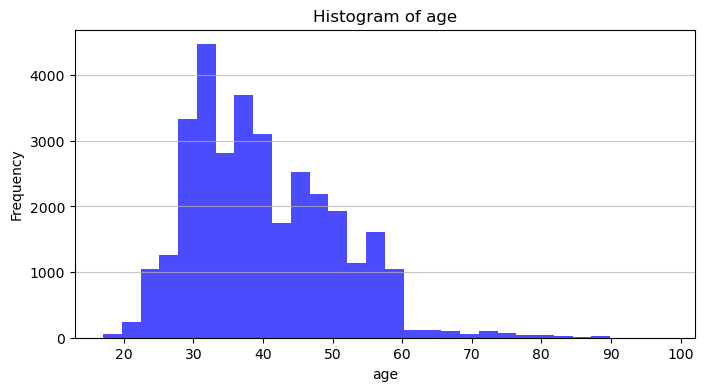

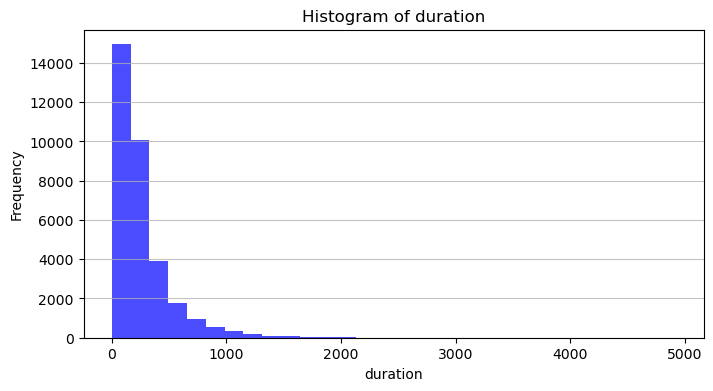

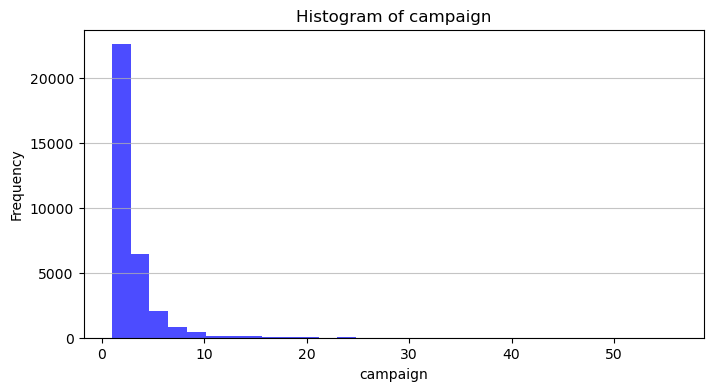

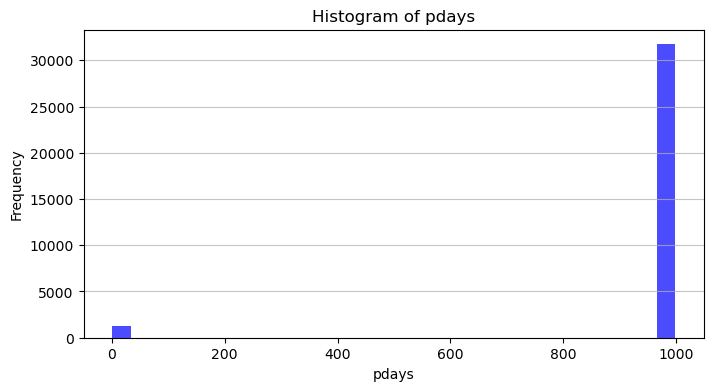

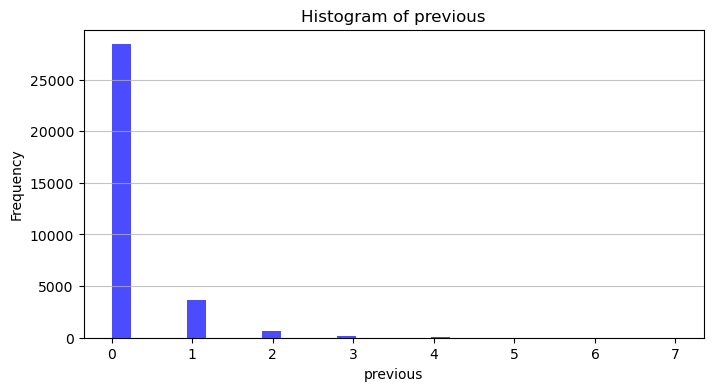

In [7]:
for column in numerical_columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[column].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [8]:
# data preparation checks
print(df.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [9]:
df.y.value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

In [10]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [11]:
round(df.y.value_counts(normalize=True), 2)

y
0    0.89
1    0.11
Name: proportion, dtype: float64

## 3. Split data (train/validation/test)

Typical split: 60% training, 20% validation and 20% test.

In [12]:
# train test split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((19770, 16), (6590, 16), (6590, 16))

In [13]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## 4. EDA and Future Importance

We review correlations and future importance for the variables. Also, rate ratio of target variable

In [14]:
# correlation analysis

x_var = []
y_var = []
correl = []

df_corr = df_train.copy()
for x in df_corr[numerical_columns].corr().index:
    for y in df_corr[numerical_columns].corr().columns:
        if x != y:
            x_var.append(x)
            y_var.append(y)
            correl.append(df_corr[numerical_columns].corr().loc[x, y])

correlation_df = pd.DataFrame({'x': x_var, 'y': y_var, 'correlation': correl})
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
correlation_df.drop_duplicates(subset=['correlation'], inplace=True)
correlation_df.reset_index(drop=True, inplace=True)
correlation_df.head(15)

,x,y,correlation
0,campaign,pdays,0.056276
1,previous,duration,0.026601
2,age,previous,0.020380
3,campaign,age,0.007057
4,age,duration,-0.001639
5,pdays,age,-0.022392
6,duration,pdays,-0.052105
7,campaign,previous,-0.079468
8,campaign,duration,-0.082693
9,pdays,previous,-0.588265


There is a negative correlation between variable `pdays` and `previous`, so we can delete one of them.

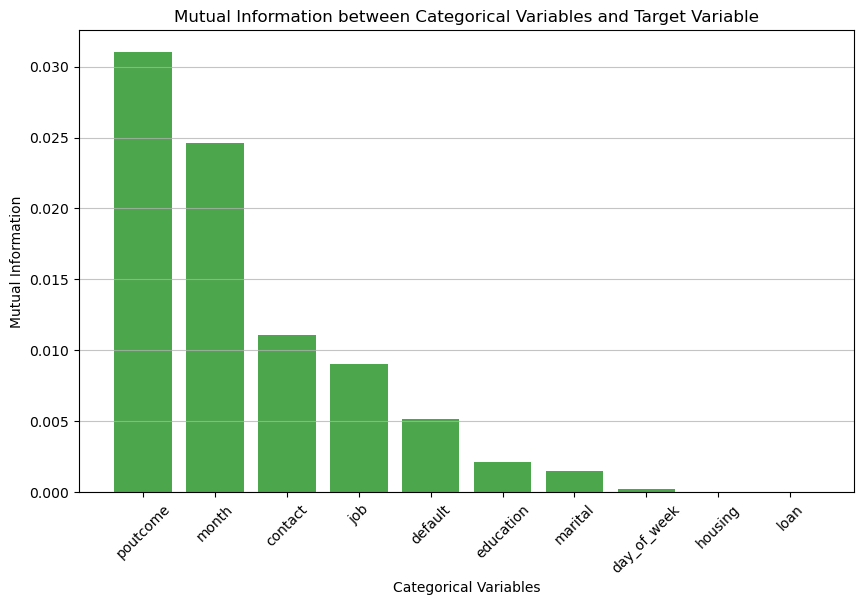

In [15]:
# mutual information for categorical variables

categorical_columns.remove('y')

list_mutual_info = []
for c in categorical_columns:
    mi = mutual_info_score(df_train['y'], df_train[c])
    list_mutual_info.append((c, mi))

mutual_info_df = pd.DataFrame(list_mutual_info, columns=['variable', 'mutual_information'])
mutual_info_df = mutual_info_df.sort_values(by='mutual_information', ascending=False)
mutual_info_df.reset_index(drop=True, inplace=True)

# plot mutual information
plt.figure(figsize=(10,6))
plt.bar(mutual_info_df['variable'], mutual_info_df['mutual_information'], color='green', alpha=0.7)
plt.title('Mutual Information between Categorical Variables and Target Variable')
plt.xlabel('Categorical Variables')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [16]:
# Function to calculate IQR and detect outliers
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df_train, numerical_columns)

# Display the number of outliers in each column
for col, outlier_data in outliers.items():
    print(f"{col}: {len(outlier_data)} outliers detected")

age: 226 outliers detected
duration: 1411 outliers detected
campaign: 1176 outliers detected
pdays: 730 outliers detected
previous: 2649 outliers detected


In [17]:
for col, outlier_data in outliers.items():
    if not outlier_data.empty:
        print("Min Value for column "+str(col)+":", outlier_data[col].min())

Min Value for column age: 70
Min Value for column duration: 645
Min Value for column campaign: 7
Min Value for column pdays: 0
Min Value for column previous: 1


In [18]:
print(df_train.shape)
df_train[~df_train.index.isin(outliers[numerical_columns[0]].index)].shape

(19770, 16)


(19544, 16)

**Rate ratio target variable**

In [19]:
print(100*np.round(df_full_train['y'].mean(),2))
print(100*np.round(df_full_train['y'].mean(),2))

11.0
11.0


In [20]:
print("Long term deposit rate general: ", np.round(df_full_train.y.mean(),2))
print("-------------------------------")
print("Long term deposit rate for unknown default: ", np.round(df_full_train[df_full_train['default']=='unknown'].y.mean(),2))
print("Long term deposit rate for no default: ", np.round(df_full_train[df_full_train['default']=='no'].y.mean(),2))
print("Long term deposit rate for yes default: ", np.round(df_full_train[df_full_train['default']=='yes'].y.mean(),2))
print("-------------------------------")
print("Long term deposit rate for failure: ", np.round(df_full_train[df_full_train['poutcome']=='failure'].y.mean(),2))
print("Long term deposit rate for success: ", np.round(df_full_train[df_full_train['poutcome']=='success'].y.mean(),2))
print("Long term deposit rate for nonexistent: ", np.round(df_full_train[df_full_train['poutcome']=='nonexistent'].y.mean(),2))

Long term deposit rate general:  0.11
-------------------------------
Long term deposit rate for unknown default:  0.05
Long term deposit rate for no default:  0.13
Long term deposit rate for yes default:  0.0
-------------------------------
Long term deposit rate for failure:  0.14
Long term deposit rate for success:  0.64
Long term deposit rate for nonexistent:  0.09


## 5. Training and model selection

The models trained are:

+ Logistic Regression
+ Decision Tree Classifier
+ Random Frorest Classsifier
+ XGB Classsifier

According to the correlation, we are going to delete variable `pdays`.

In this section, we compare the AUC of the different models in the validation set with the fine tuning for each model.

In [21]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

# eliminate pdays due to correlation analysis
df_train.drop(['y', 'pdays'], axis=1, inplace=True)
df_val.drop(['y', 'pdays'], axis=1, inplace=True)
df_test.drop(['y', 'pdays'], axis=1, inplace=True)

### Linear Regression

To get best model we are going to use different variables and tunning hyperparameters

In [22]:
def model_regression(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse=False)
    train_dicts = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    return dv, model

def evaluate_model(dv, model, df_val, y_val, threshold=0.5):
    
    val_dicts = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    y_pred = model.predict_proba(X_val)[:, 1]
    churn_decision = (y_pred >= threshold).astype(int)
    accuracy = (churn_decision == y_val).mean()
    
    return accuracy, y_pred

In [23]:
# original accuracy
dv, model = model_regression(df_train, y_train, C=1.0)
orig_accuracy, _ = evaluate_model(dv, model, df_val, y_val)
print("Original accuracy:", orig_accuracy, "\n")

accuracy_results = {}

for column_drop in df_train.columns:
    df_train_temp = df_train.drop(columns=[column_drop])
    dv, model = model_regression(df_train_temp, y_train)
    df_val_temp = df_val.drop(columns=[column_drop])
    accuracy, _ = evaluate_model(dv, model, df_val_temp, y_val)
    accuracy_results[column_drop] = accuracy
    print(f'Dropping {column_drop}, accuracy: {accuracy.round(3)}')

df_accuracy = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['accuracy'])
df_accuracy['accuracy_diff'] = df_accuracy['accuracy'] - orig_accuracy
df_accuracy = df_accuracy.sort_values(by='accuracy', ascending=False)

df_accuracy.head(10)

Original accuracy: 0.9015174506828528 

Dropping age, accuracy: 0.9
Dropping job, accuracy: 0.901
Dropping marital, accuracy: 0.901
Dropping education, accuracy: 0.901
Dropping default, accuracy: 0.901
Dropping housing, accuracy: 0.902
Dropping loan, accuracy: 0.901
Dropping contact, accuracy: 0.901
Dropping month, accuracy: 0.9
Dropping day_of_week, accuracy: 0.901
Dropping duration, accuracy: 0.891
Dropping campaign, accuracy: 0.901
Dropping previous, accuracy: 0.901
Dropping poutcome, accuracy: 0.897


,accuracy,accuracy_diff
housing,0.901669,0.000152
marital,0.901366,-0.000152
loan,0.901366,-0.000152
job,0.901214,-0.000303
education,0.901062,-0.000455
day_of_week,0.901062,-0.000455
previous,0.901062,-0.000455
contact,0.900759,-0.000759
campaign,0.900759,-0.000759
default,0.900607,-0.000910


In [24]:
features_one = ['age', 'job', 'marital', 'education', 'default', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome']

dv, model = model_regression(df_train[features_one], y_train, C=1.0)
orig_accuracy, _ = evaluate_model(dv, model, df_val[features_one], y_val)
print("Original accuracy:", orig_accuracy, "\n")


Original accuracy: 0.9016691957511381 



In [25]:
accuracy_results_C = {}
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    dv, model = model_regression(df_train[features_one], y_train, C=C)
    accuracy, _ = evaluate_model(dv, model, df_val[features_one], y_val)
    print(f'C={C}, accuracy: {accuracy}')
    accuracy_results_C[C] = round(accuracy, 3)
    
df_accuracy_C = pd.DataFrame.from_dict(accuracy_results_C, orient='index', columns=['accuracy'])
df_accuracy_C = df_accuracy_C.sort_values(by='accuracy', ascending=False)
df_accuracy_C

C=0.001, accuracy: 0.8889226100151745
C=0.01, accuracy: 0.8963581183611533
C=0.1, accuracy: 0.9007587253414264
C=1, accuracy: 0.9016691957511381
C=10, accuracy: 0.9015174506828528
C=100, accuracy: 0.9015174506828528


,accuracy
1.000,0.902
10.000,0.902
100.000,0.902
0.100,0.901
0.010,0.896
0.001,0.889


In [26]:
feature_importances = {}
for feature in ['age', 'duration', 'campaign', 'previous']:

    dv, model = model_regression(df_train[[feature]], y_train, C=1.0)
    accuracy, y_pred = evaluate_model(dv, model, df_val[[feature]], y_val)
    
    # Calculate ROC AUC
    auc_score = roc_auc_score(y_val, y_pred)
    feature_importances[feature] = auc_score

sorted_features = sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)

print("Feature Importance based on Individual ROC AUC:")
for feature, auc in sorted_features:
    print(f"{feature}: {auc:.4f}")

Feature Importance based on Individual ROC AUC:
duration: 0.8180
previous: 0.5903
campaign: 0.5536
age: 0.5111


In [27]:
feature_selection = ['duration', 'previous', 'campaign', 'age'
                    ,'poutcome', 'month', 'contact', 'job', 'default'
                    ,'loan'
                     ]

dv, model = model_regression(df_train[feature_selection], y_train, C=1)
accuracy, y_pred = evaluate_model(dv, model, df_val[feature_selection], y_val)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.9021244309559939


In [28]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 0.01, 0.1, 1, 10]):

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_aux = df_full_train.iloc[train_idx]
        df_val_aux = df_full_train.iloc[val_idx]
        
        y_train_aux = df_train_aux.y.values
        y_val_aux = df_val_aux.y.values

        dv, model = model_regression(df_train_aux[feature_selection], y_train_aux, C=C)
        accuracy, y_pred = evaluate_model(dv, model, df_val_aux[feature_selection], y_val_aux)
        
        auc = roc_auc_score(y_val_aux, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/6 [00:00<?, ?it/s]

C=1e-06 0.673 +- 0.012
C=0.001 0.840 +- 0.007
C=0.01 0.908 +- 0.005
C=0.1 0.913 +- 0.005
C=1 0.913 +- 0.005
C=10 0.913 +- 0.005


In [29]:
# final future model

feature_selection = ['duration', 'previous', 'campaign', 'age'
                    ,'poutcome', 'month', 'contact', 'job', 'default'
                    ,'loan'
                     ]

dv, model = model_regression(df_train[feature_selection], y_train, C=1)
accuracy, y_pred = evaluate_model(dv, model, df_val[feature_selection], y_val)
print("Final model accuracy:", accuracy)

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val, (y_pred >= 0.5).astype(int)))

print("Final model ROC AUC:", roc_auc_score(y_val, y_pred))

Final model accuracy: 0.9021244309559939
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5820
           1       0.67      0.32      0.43       770

    accuracy                           0.90      6590
   macro avg       0.79      0.65      0.69      6590
weighted avg       0.89      0.90      0.89      6590

Final model ROC AUC: 0.908639487660106


Decision Tree Classifier

In [30]:
# Decision Tree Classifier
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
X_train = dv.transform(df_train[feature_selection].to_dict(orient='records'))
X_val = dv.transform(df_val[feature_selection].to_dict(orient='records'))
# X_train = dv.transform(df_train.to_dict(orient='records'))
# X_val = dv.transform(df_val.to_dict(orient='records'))

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.676
   2 -> 0.746
   3 -> 0.769
   4 -> 0.787
   5 -> 0.850
   6 -> 0.858
  10 -> 0.836
  15 -> 0.742
  20 -> 0.702
None -> 0.684


In [31]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.787  0.850  0.856
5                 0.787  0.850  0.860
10                0.787  0.852  0.863
15                0.788  0.852  0.864
20                0.788  0.853  0.863
100               0.787  0.851  0.866
200               0.837  0.860  0.877
500               0.840  0.863  0.873

Random Forest Classsifier

In [32]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.round(3)

,n_estimators,auc
0,10,0.870
1,20,0.891
2,30,0.899
3,40,0.901
4,50,0.903
5,60,0.904
6,70,0.906
7,80,0.906
8,90,0.906
9,100,0.906


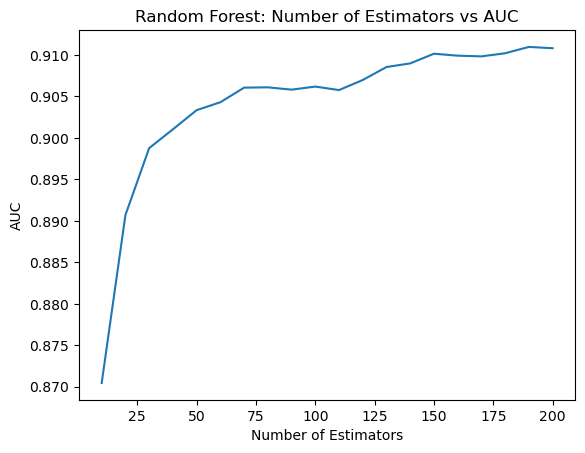

In [33]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('Number of Estimators')
plt.ylabel('AUC')
plt.title('Random Forest: Number of Estimators vs AUC')
plt.show()

In [34]:
scores = []

for n in range(180, 351, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.round(3)

,n_estimators,auc
0,180,0.910
1,190,0.911
2,200,0.911
3,210,0.911
4,220,0.911
5,230,0.911
6,240,0.911
7,250,0.912
8,260,0.912
9,270,0.912


In [35]:
scores = []

for d in [5, 10, 15]:
    for n in range(200, 251, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,auc
0,5,200,0.905567
1,5,210,0.905032
2,5,220,0.904735
3,5,230,0.904555
4,5,240,0.904238
5,5,250,0.903994
6,10,200,0.920316
7,10,210,0.920481
8,10,220,0.920530
9,10,230,0.920552


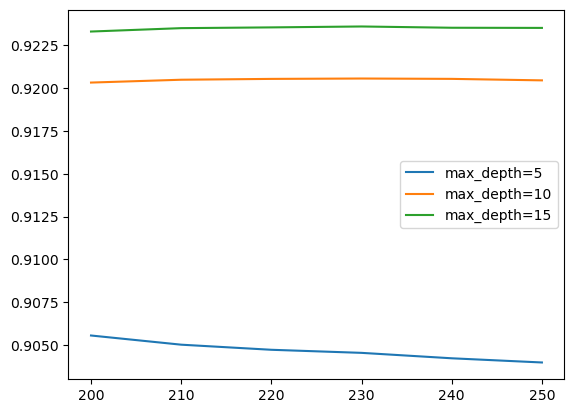

In [36]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [37]:
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(200, 251, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,min_samples_leaf,n_estimators,auc
0,1,200,0.923291
1,1,210,0.923489
2,1,220,0.923533
3,1,230,0.923586
4,1,240,0.923512
5,1,250,0.923503
6,3,200,0.926208
7,3,210,0.926072
8,3,220,0.926013
9,3,230,0.926103


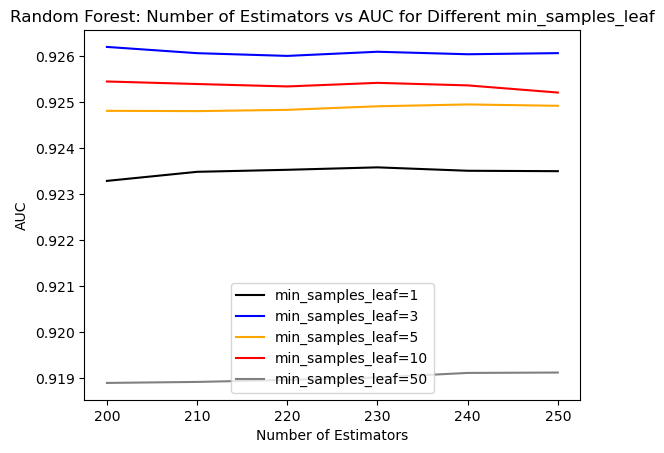

In [38]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('AUC')
plt.title('Random Forest: Number of Estimators vs AUC for Different min_samples_leaf')
plt.show()

In [39]:
min_samples_leaf = 3
max_depth = 15
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"AUC: {auc:.3f}")

print("Accuracy Report:")
print(classification_report(y_val, (y_pred >= 0.5).astype(int)))

AUC: 0.926
Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5820
           1       0.66      0.32      0.43       770

    accuracy                           0.90      6590
   macro avg       0.79      0.65      0.69      6590
weighted avg       0.89      0.90      0.89      6590



XGBoost Classsifier

In [40]:
# xgboost model
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [41]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9228082742000268

In [42]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [43]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [44]:
s = output.stdout
print(s)

[0]	train-auc:0.87295	val-auc:0.86400
[5]	train-auc:0.93412	val-auc:0.91793
[10]	train-auc:0.94202	val-auc:0.92306
[15]	train-auc:0.94503	val-auc:0.92474
[20]	train-auc:0.94841	val-auc:0.92525
[25]	train-auc:0.95099	val-auc:0.92519
[30]	train-auc:0.95393	val-auc:0.92492
[35]	train-auc:0.95626	val-auc:0.92387
[40]	train-auc:0.95904	val-auc:0.92295
[45]	train-auc:0.96130	val-auc:0.92215
[50]	train-auc:0.96329	val-auc:0.92126
[55]	train-auc:0.96433	val-auc:0.92052
[60]	train-auc:0.96698	val-auc:0.91966
[65]	train-auc:0.96851	val-auc:0.91961
[70]	train-auc:0.96949	val-auc:0.91927
[75]	train-auc:0.97041	val-auc:0.91843
[80]	train-auc:0.97150	val-auc:0.91837
[85]	train-auc:0.97222	val-auc:0.91759
[90]	train-auc:0.97330	val-auc:0.91727
[95]	train-auc:0.97463	val-auc:0.91592
[100]	train-auc:0.97552	val-auc:0.91561
[105]	train-auc:0.97685	val-auc:0.91514
[110]	train-auc:0.97786	val-auc:0.91492
[115]	train-auc:0.97916	val-auc:0.91397
[120]	train-auc:0.98029	val-auc:0.91325
[125]	train-auc:0.9815

In [45]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

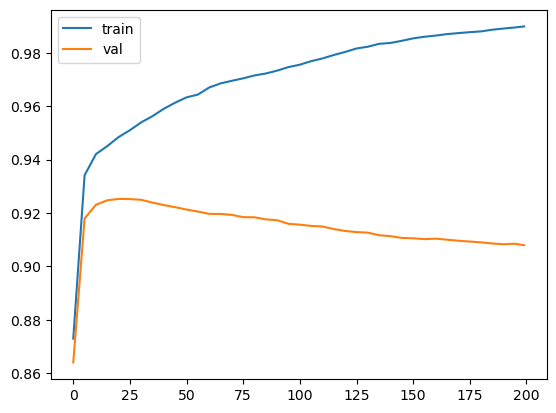

In [46]:
df_score = parse_xgb_output(output)

plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

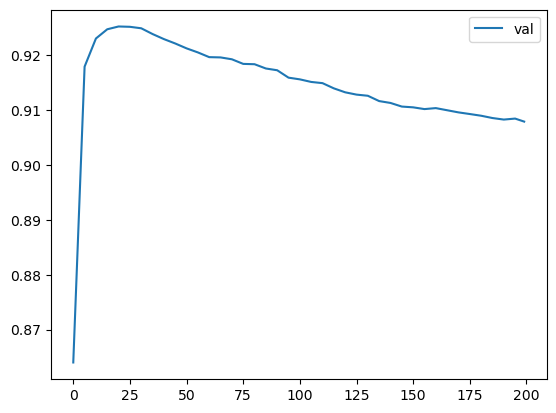

In [47]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [48]:
scores = {}

In [59]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [60]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [61]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.7', 'eta=1.0'])

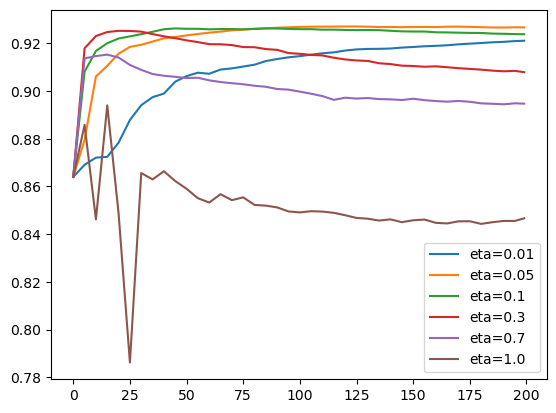

In [62]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
# plt.ylim(0.8, 0.84)
plt.legend()

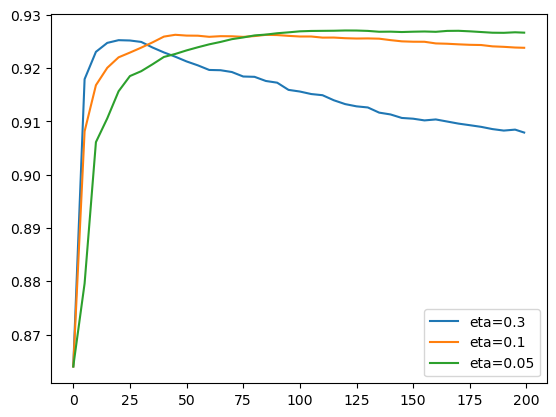

In [64]:
etas = ["eta=0.3", "eta=0.1", "eta=0.05"]
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

In [65]:
scores = {}

In [79]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [80]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

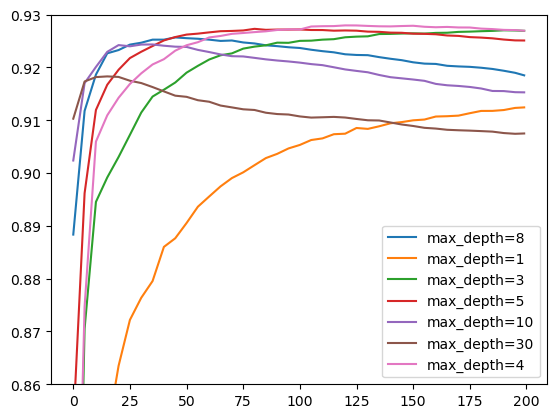

In [81]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.86, 0.93)
plt.legend()

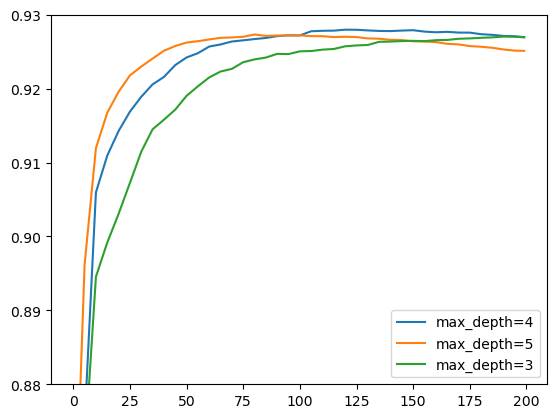

In [82]:
max_depths = ["max_depth=4", "max_depth=5", "max_depth=3"]
for max_depth in max_depths:
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.88, 0.93)
plt.legend()

In [83]:
scores={}

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [93]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=15'

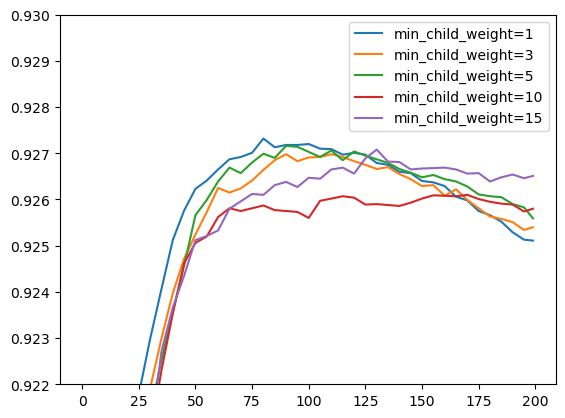

In [96]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.922, 0.93)
plt.legend()

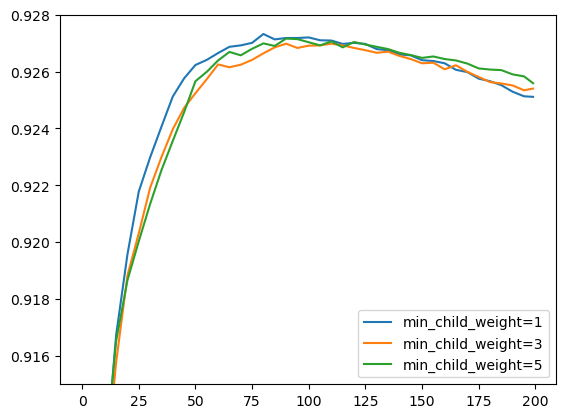

In [97]:
min_child_weight = ["min_child_weight=1", "min_child_weight=3", "min_child_weight=5"]
for min_child_weight in min_child_weight:
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.915, 0.928)
plt.legend()

In [99]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"XGBoost Classifier AUC: {roc_auc:.3f}")

XGBoost Classifier AUC: 0.927


## 6. Select a Final Model

In [100]:
feature_selection = ['duration', 'previous', 'campaign', 'age'
                    ,'poutcome', 'month', 'contact', 'job', 'default'
                    ,'loan'
                     ]

dv, model = model_regression(df_train[feature_selection], y_train, C=1)
accuracy, y_pred = evaluate_model(dv, model, df_val[feature_selection], y_val)
print("Logistic Regression model accuracy:", accuracy)

print("Logistic Regression model ROC AUC:", roc_auc_score(y_val, y_pred))

Logistic Regression model accuracy: 0.9021244309559939
Logistic Regression model ROC AUC: 0.908639487660106


In [101]:
X_train = dv.transform(df_train[feature_selection].to_dict(orient='records'))
X_val = dv.transform(df_val[feature_selection].to_dict(orient='records'))

In [102]:
depth = 6
s = 200
dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"Decision Tree Classifier AUC: {auc:.3f}")

Decision Tree Classifier AUC: 0.877


In [103]:
min_samples_leaf = 3
max_depth = 15
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"Random Forest AUC: {auc:.3f}")

Random Forest AUC: 0.926


In [104]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print(f"XGBoost AUC: {auc:.3f}")

XGBoost AUC: 0.927


## 7. Final model evaluation

In [105]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.y.values
df_full_train.drop(['y', 'pdays'], axis=1, inplace=True)

In [106]:
df_full_train = df_full_train[feature_selection]
df_test = df_test[feature_selection]

In [107]:
dicts_full_train = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [108]:
features = list(dv.get_feature_names_out())

dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, 
        feature_names=features )

dtest = xgb.DMatrix(X_test, label=y_test, 
        feature_names=features )

In [109]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfull_train, num_boost_round=100)

y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print(f"XGBoost AUC: {auc:.3f}")

XGBoost AUC: 0.927
